In [144]:
import pandas as pd

In [145]:
df=pd.read_csv("/Users/hp/Downloads/adult_tmp.csv")

In [146]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [147]:
X=df.drop(columns=["income"])
y=df["income"]

Train test split

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


<span style="color:salmon; font-size:20px;">1. K Nearest Neighbors</span>

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [150]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy of knn

In [151]:
print(accuracy_score(y_test,y_pred))

0.8156900830905364


In [152]:
from sklearn.decomposition import PCA


selecting 2 features

In [153]:
df_for_2=df[["workclass","education-num-cat"]]


splitting the dataset

In [154]:
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(df_for_2,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=15,metric="manhattan")
knn.fit(X_train_2,y_train_2)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [155]:
import numpy as np

generating meshgrids

In [156]:
#calculate min max value for two columns and extending range by 1 unit
min_x=df_for_2.iloc[:,0].min()-1
max_x=df_for_2.iloc[:,0].max()+1

min_y=df_for_2.iloc[:,1].min()-1
max_y=df_for_2.iloc[:,1].max()+1

x_2,y_2=np.meshgrid(np.arange(min_x,max_x,0.02),np.arange(min_y,max_y,0.02))


In [157]:
pred_2=knn.predict(np.c_[x_2.ravel(),y_2.ravel()])
pred_2=pred_2.reshape(x_2.shape)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [158]:
import matplotlib.pyplot as plt

visualisation

In [159]:
from matplotlib.colors import ListedColormap

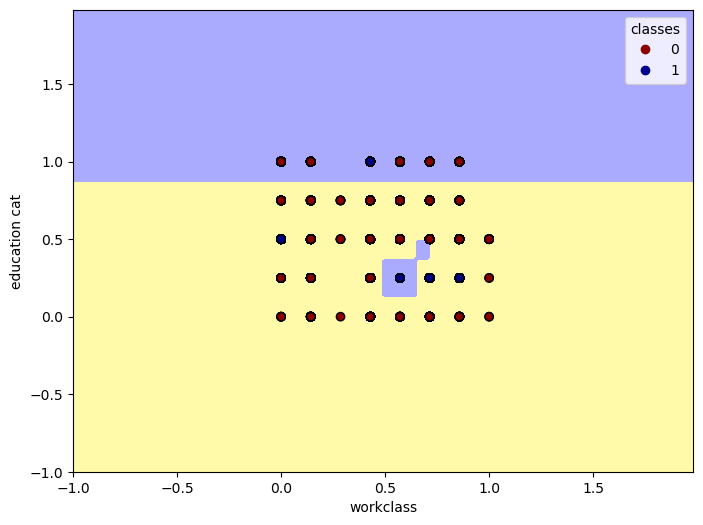

In [160]:
c_mp=ListedColormap(['#FFFAAA',"#AAAAFF"])
c_mp2=["darkred","darkblue"]
plt.figure(figsize=(8,6))
plt.contourf(x_2,y_2,pred_2,cmap=c_mp)
scatter=plt.scatter(df_for_2.iloc[:,0],df_for_2.iloc[:,1],c=y,cmap=ListedColormap(c_mp2),edgecolors="k")
plt.xlabel("workclass")
plt.ylabel("education cat")
plt.legend(*scatter.legend_elements(),title="classes")
plt.show()

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [162]:
y_pred=knn.predict(X_test_2)
cm=confusion_matrix(y_test_2,y_pred)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


generating heatmap

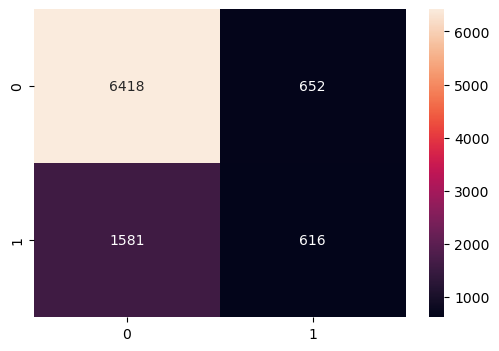

In [163]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

Roc curve

In [164]:
from sklearn.metrics import roc_curve,auc

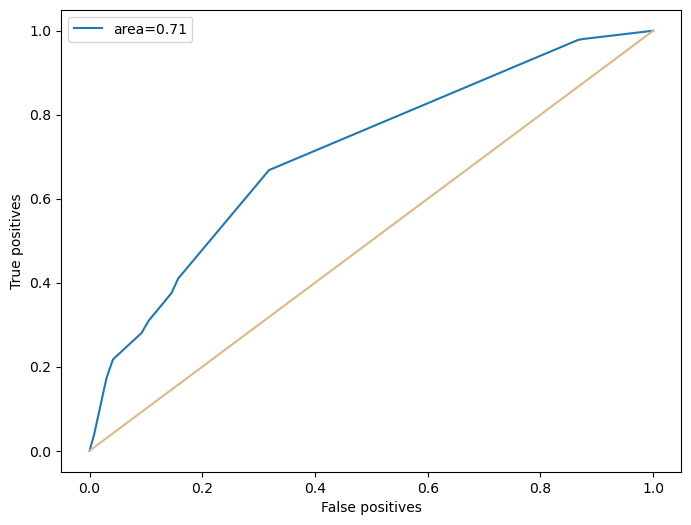

In [165]:
y_prob=knn.predict_proba(X_test_2)[:,1]#predicting probabilities of positive class
fpr,tpr,thresold=roc_curve(y_test_2,y_prob)# compute false positive rate, true positve rate and thresold
Auc=auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"area={Auc:.2f}")
plt.plot([0,1],[0,1],color="burlywood")
plt.xlabel("False positives")
plt.ylabel("True positives")
plt.legend()
plt.show()

In [166]:
print(accuracy_score(y_test_2,y_pred))

0.7590374446962339


<span style="color:salmon; font-size:20px;">2. K Means</span>

In [167]:
from sklearn.cluster import KMeans



using elbow method to check best k value

In [168]:
inertia=[]
values=range(1,10)
for k in values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

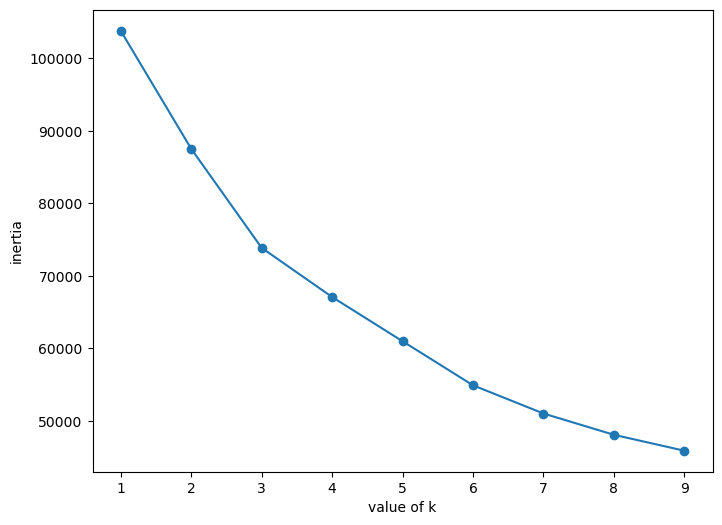

In [169]:
plt.figure(figsize=(8,6))
plt.plot(values,inertia,marker="o")
plt.xlabel("value of k")
plt.ylabel("inertia")
plt.show()

chosing two features using pca

In [170]:
pca=PCA(n_components=2)
df_for_pca=pca.fit_transform(df)

fitting model and predicting

In [171]:
kmeans=KMeans(n_clusters=7,random_state=42)
kmeans.fit(df)
clusters=kmeans.predict(df)

In [172]:
print(clusters)

[6 1 5 ... 1 0 1]


finding cluster centers

In [173]:
centroids_pca=pca.transform(kmeans.cluster_centers_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [174]:
print(pd.DataFrame(pca.components_,columns=df.columns))

   workclass    income  age_group  hours-per-week-cat  education-num-cat  \
0  -0.014344 -0.394090   0.210368           -0.011183          -0.014502   
1  -0.015054  0.012282  -0.100368           -0.021229           0.022101   

   occupation_craft repair  occupation_exec managerial  occupation_others  \
0                -0.116469                   -0.130094           0.253006   
1                 0.212332                    0.150848          -0.705584   

   occupation_prof specialty  relationship_not in family  relationship_others  \
0                  -0.082285                    0.074763             0.508755   
1                   0.171776                    0.096724             0.184055   

   race_white  sex_male  native-country_usa  marital-status_never married  \
0   -0.103575 -0.450300           -0.016350                      0.462038   
1   -0.025292 -0.443569            0.012409                     -0.151988   

   marital-status_others  
0               0.083425  
1        

In [175]:
import matplotlib.pyplot as plt


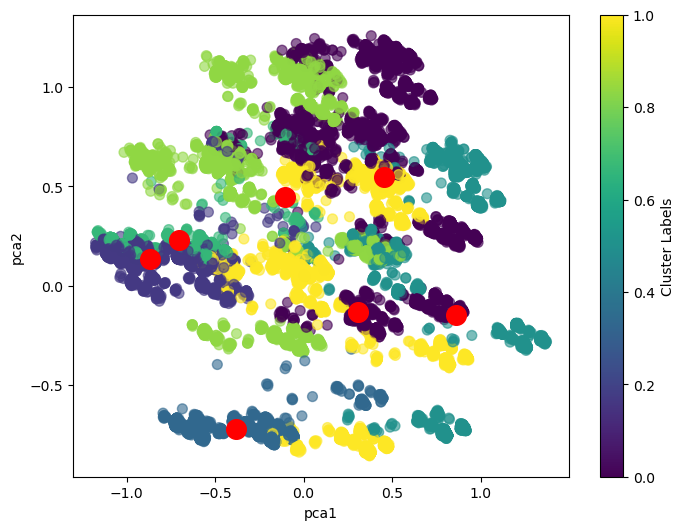

In [176]:
plt.figure(figsize=(8,6))
plt.scatter(df_for_pca[:,0],df_for_pca[:,1],c=clusters,s=50,alpha=0.6,cmap="viridis")
scatter=plt.scatter(centroids_pca[:,0],centroids_pca[:,1],c="red",s=200,label="centroids")
plt.colorbar(scatter,label="Cluster Labels")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

<AxesSubplot:>

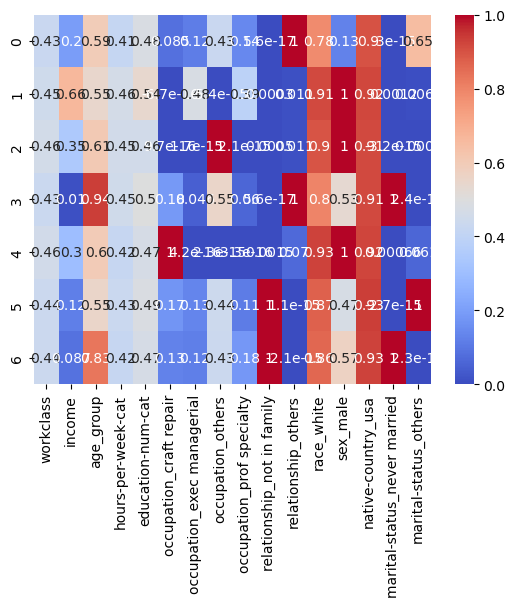

In [177]:
sns.heatmap(pd.DataFrame(kmeans.cluster_centers_,columns=df.columns),annot=True,cmap="coolwarm")

size of clusters

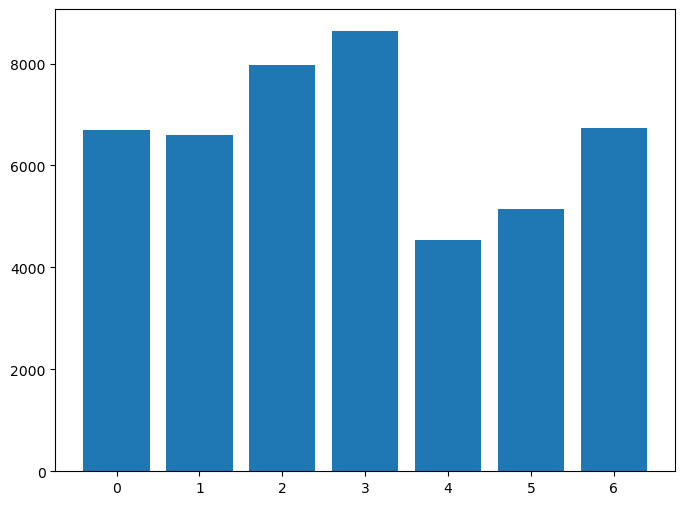

In [178]:
clusters_size=np.bincount(kmeans.labels_)
plt.figure(figsize=(8,6))
plt.bar(range(len(clusters_size)),clusters_size)
plt.show()

<span style="color:salmon; font-size:20px;">3. Random Forest Classifier</span>

In [179]:
from sklearn.ensemble import RandomForestClassifier


In [180]:
rfc=RandomForestClassifier(n_estimators=80,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, random_state=42)

In [181]:
y_pred=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8232437682097766


bar graph for feature importance

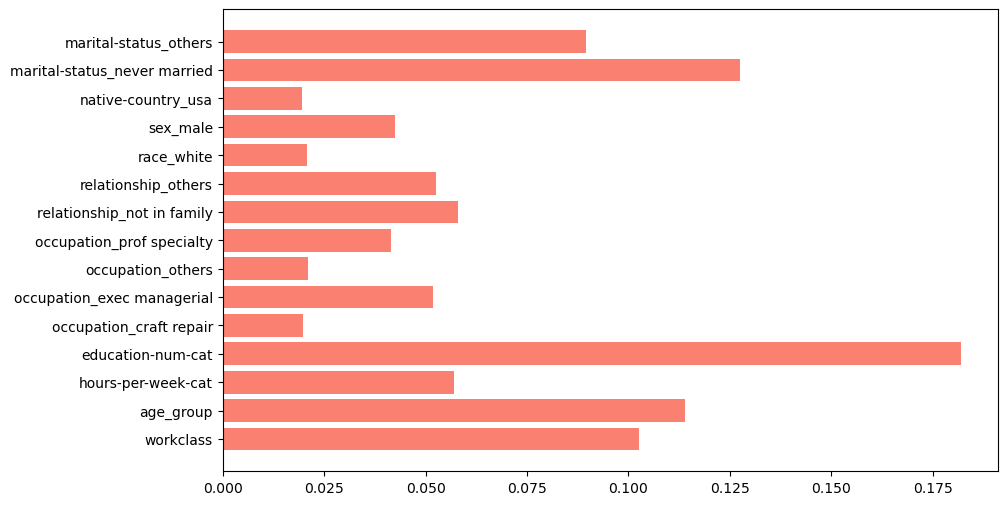

In [182]:
plt.figure(figsize=(10,6))
plt.barh(X.columns,rfc.feature_importances_,color="salmon")
plt.show()

finding probabilities and fp,tp rate for ROC

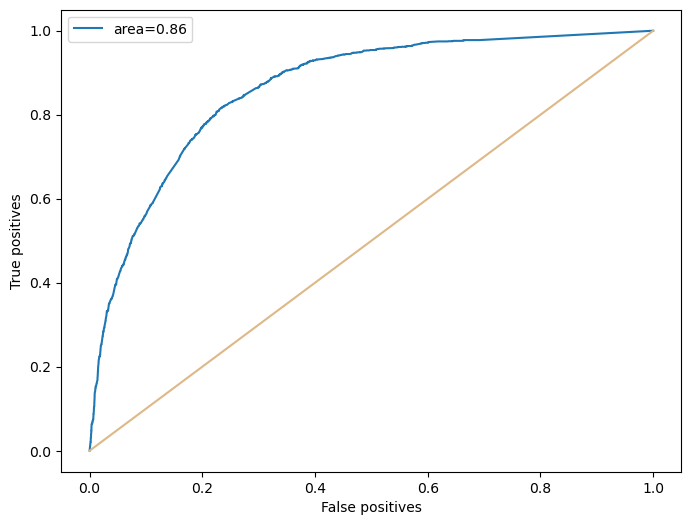

In [183]:
y_prob=rfc.predict_proba(X_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,y_prob)
Auc=auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"area={Auc:.2f}")
plt.plot([0,1],[0,1],color="burlywood")
plt.xlabel("False positives")
plt.ylabel("True positives")
plt.legend()
plt.show()

In [184]:
from sklearn.metrics import precision_recall_curve

curve for precision and recall

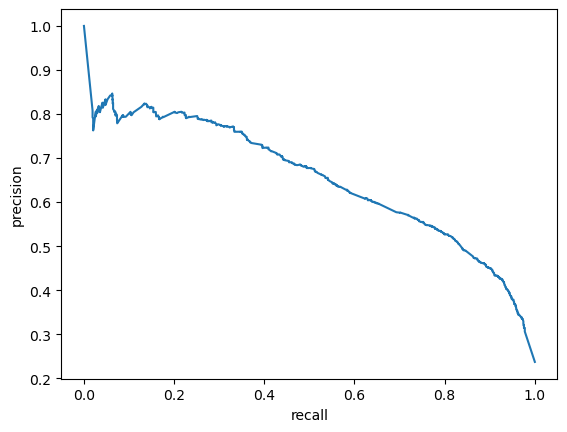

In [185]:
y_prob=rfc.predict_proba(X_test)[:,1]
precision,recall,_=precision_recall_curve(y_test,y_prob)
plt.plot(recall,precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

partial dependence graph

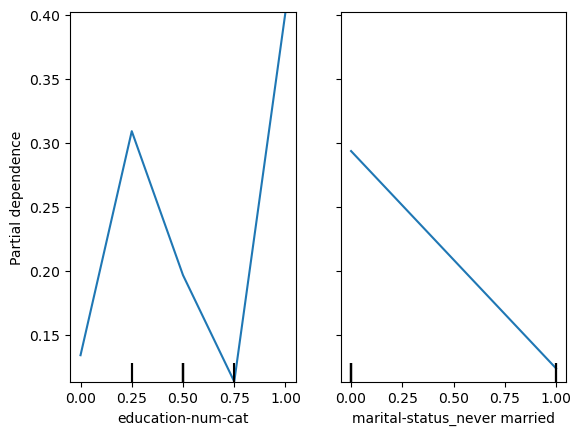

In [186]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(rfc,X_train,["education-num-cat","marital-status_never married"])
plt.show()

<span style="color:salmon; font-size:20px;">4. Gradient Boosting Classifier</span>

In [187]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


In [188]:
gbc=GradientBoostingClassifier(n_estimators=300,learning_rate=0.1,max_depth=3,random_state=42)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=300, random_state=42)

In [189]:
y_pred=gbc.predict(X_test)

In [190]:
print(accuracy_score(y_test,y_pred))

0.8365166720621561


In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      7070
         1.0       0.70      0.54      0.61      2197

    accuracy                           0.84      9267
   macro avg       0.78      0.73      0.75      9267
weighted avg       0.83      0.84      0.83      9267



confusion matrix

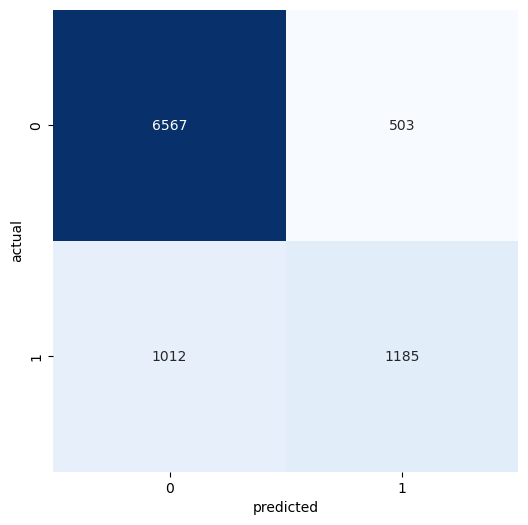

In [192]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

feature importance with bar graph

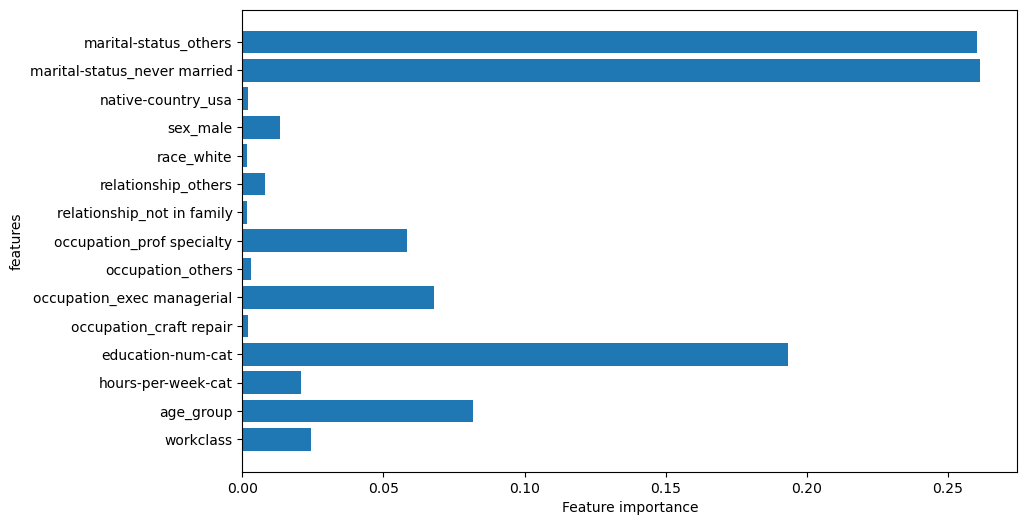

In [193]:
feature_imp=gbc.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X_train.columns,feature_imp)
plt.xlabel("Feature importance")
plt.ylabel("features")
plt.show()

creating lift graph

In [194]:
y_prob_sort,y_test_sort=zip(*sorted(zip(y_prob,y_test),reverse=True))
cum_gain=np.cumsum(y_test_sort)/sum(y_test)
lift=cum_gain/(np.arange(1,len(cum_gain)+1)/len(cum_gain))

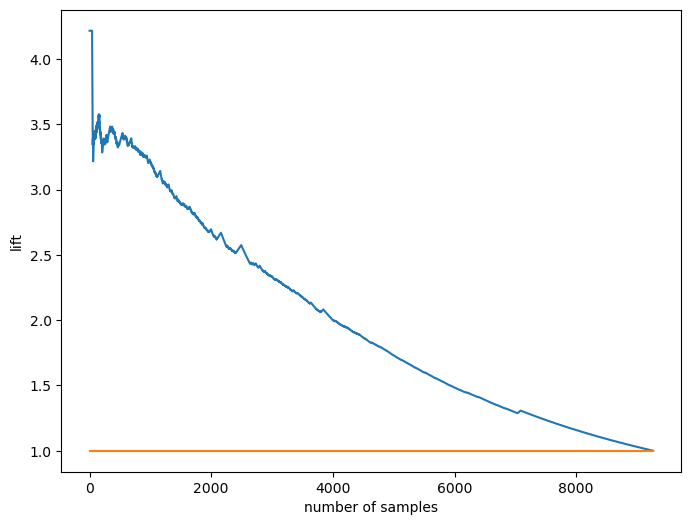

In [195]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lift)),lift,label="lift")
plt.plot([0,len(lift)],[1,1],label="Random guessing")
plt.xlabel("number of samples")
plt.ylabel("lift")
plt.show()

<span style="color:salmon; font-size:20px;">5. Logistic Regression</span>

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
logregr=LogisticRegression(max_iter=1000)
logregr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [198]:
y_pred=logregr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8169850005395489


confusion metrix

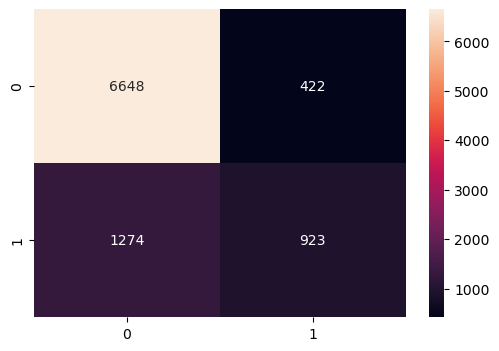

In [199]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [200]:
y_prob=logregr.predict_proba(X_test)[:, 1]
fpr, tpr, threshold=roc_curve(y_test, y_prob)
auc_score=auc(fpr, tpr)

Roc curve

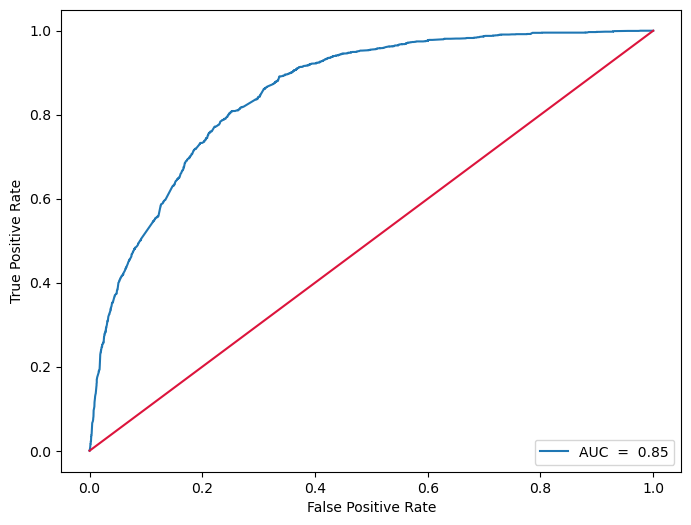

In [201]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC  =  {auc_score:.2f}")
plt.plot([0, 1],[0, 1],color="crimson")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [202]:
coeff=pd.DataFrame(logregr.coef_.T,index=X_train.columns,columns=["Coefficient"]).sort_values(by="Coefficient")

feature weight

<Figure size 800x600 with 0 Axes>

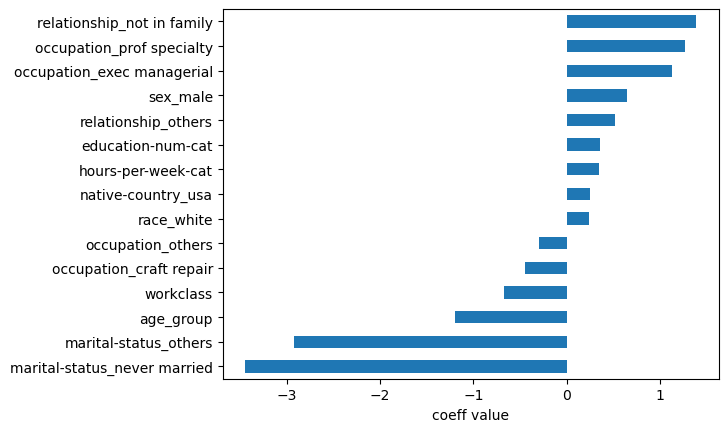

In [203]:
plt.figure(figsize=(8,6))
coeff.plot(kind="barh",legend=False)
plt.xlabel("coeff value")
plt.show()

<span style="color:salmon; font-size:20px;">6. SVM</span>

In [204]:
from sklearn.svm import SVC

In [205]:
svm=SVC(kernel='linear', probability = True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [206]:
y_pred=svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8176324592640553


confusion matrix

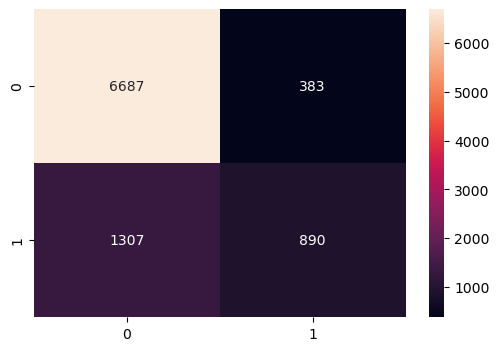

In [207]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [211]:
y_prob=svm.predict_proba(X_test)[:, 1]
fpr, tpr, threshold=roc_curve(y_test, y_prob)
auc_score=auc(fpr, tpr)

Auc curve

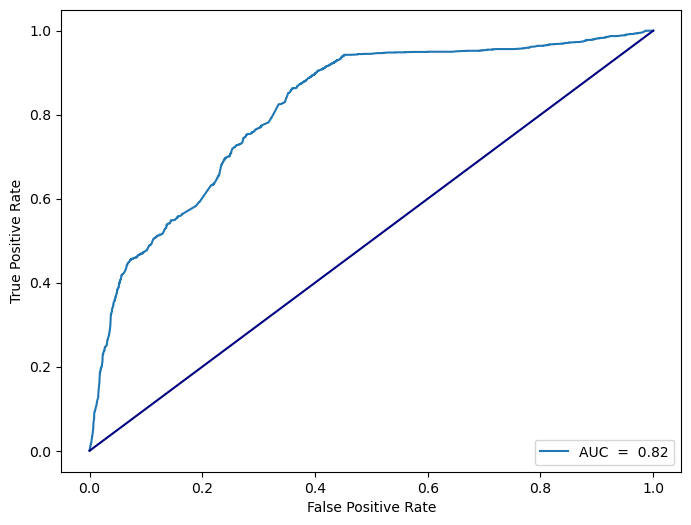

In [212]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC  =  {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color = "navy")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "lower right")
plt.show()

precision recall curve

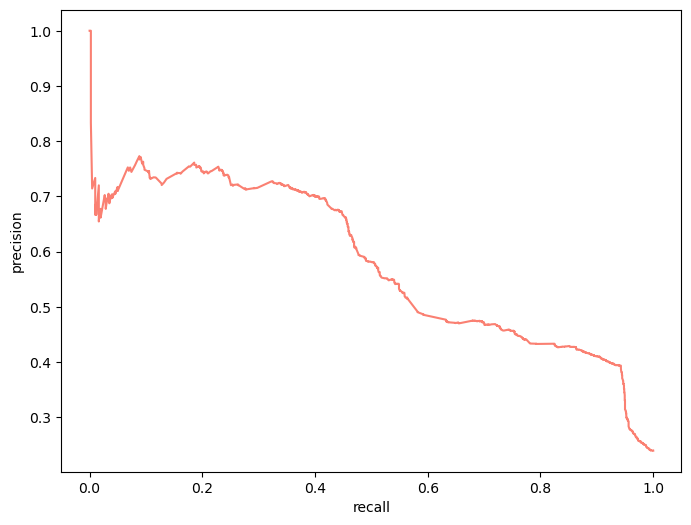

In [213]:
precision,recall,_=precision_recall_curve(y_test,y_prob)
plt.figure(figsize=(8,6))
plt.plot(recall,precision,color="salmon")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()